In [82]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import seaborn as sns
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
import seaborn as sns

import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from sklearn import feature_extraction
from sklearn.metrics import confusion_matrix
from sklearn import model_selection as ms
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nikita\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nikita\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Importing dataset from Sqlite

In [83]:
conn = sql.connect("airbnblisting.db")
listing = pd.read_sql("Select * from airbnblisting", conn)

## Dataset Info

In [84]:
listing

,id,listing_id,listing_name,listing_location,listing_neighbourhood,listing_latitude,listing_longitude,listing_price,listing_review_scores,listing_comments
0,1,109,Amazing bright elegant condo park front *UPGRA...,"Los Angeles, CA",Culver City,33.98301,-118.38607,115.0,4.00,The host canceled my reservation the day befor...
1,2,109,Amazing bright elegant condo park front *UPGRA...,"Los Angeles, CA",Culver City,33.98301,-118.38607,115.0,4.00,Me and two friends stayed for four and a half ...
2,3,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Los Angeles, CA",Hollywood,34.09625,-118.34605,93.0,4.86,Very nice place to stay...Charles was great
3,4,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Los Angeles, CA",Hollywood,34.09625,-118.34605,93.0,4.86,Charles is a most wonderful host. I enjoyed my...
4,5,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Los Angeles, CA",Hollywood,34.09625,-118.34605,93.0,4.86,Location is decent (near some great music stor...
...,...,...,...,...,...,...,...,...,...,...
536394,536395,715489223335352960,1B1B | Adventure | Relaxing | Free Gated Parking,"Denver, CO",Villa Park,39.73807,-105.06489,119.0,5.00,Great place to stay! Very clean and completely...
536395,536396,715489223335352960,1B1B | Adventure | Relaxing | Free Gated Parking,"Denver, CO",Villa Park,39.73807,-105.06489,119.0,5.00,10/10 recommend! It was a wonderful place to s...
536396,536397,715504378635463040,1B1B | Comfy | Red Rocks | Free Gated Parking,"Denver, CO",Villa Park,39.73913,-105.06558,119.0,5.00,"Very clean, great responsiveness from host, ea..."
536397,536398,715504378635463040,1B1B | Comfy | Red Rocks | Free Gated Parking,"Denver, CO",Villa Park,39.73913,-105.06558,119.0,5.00,Ali and Ella were wonderful hosts! The place w...


In [85]:
# Retrieve data from database
data = pd.read_sql("Select * from airbnblisting", conn)
# Get DataFrame from Dict
df = data

In [86]:
#display the dataframe
df

,id,listing_id,listing_name,listing_location,listing_neighbourhood,listing_latitude,listing_longitude,listing_price,listing_review_scores,listing_comments
0,1,109,Amazing bright elegant condo park front *UPGRA...,"Los Angeles, CA",Culver City,33.98301,-118.38607,115.0,4.00,The host canceled my reservation the day befor...
1,2,109,Amazing bright elegant condo park front *UPGRA...,"Los Angeles, CA",Culver City,33.98301,-118.38607,115.0,4.00,Me and two friends stayed for four and a half ...
2,3,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Los Angeles, CA",Hollywood,34.09625,-118.34605,93.0,4.86,Very nice place to stay...Charles was great
3,4,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Los Angeles, CA",Hollywood,34.09625,-118.34605,93.0,4.86,Charles is a most wonderful host. I enjoyed my...
4,5,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Los Angeles, CA",Hollywood,34.09625,-118.34605,93.0,4.86,Location is decent (near some great music stor...
...,...,...,...,...,...,...,...,...,...,...
536394,536395,715489223335352960,1B1B | Adventure | Relaxing | Free Gated Parking,"Denver, CO",Villa Park,39.73807,-105.06489,119.0,5.00,Great place to stay! Very clean and completely...
536395,536396,715489223335352960,1B1B | Adventure | Relaxing | Free Gated Parking,"Denver, CO",Villa Park,39.73807,-105.06489,119.0,5.00,10/10 recommend! It was a wonderful place to s...
536396,536397,715504378635463040,1B1B | Comfy | Red Rocks | Free Gated Parking,"Denver, CO",Villa Park,39.73913,-105.06558,119.0,5.00,"Very clean, great responsiveness from host, ea..."
536397,536398,715504378635463040,1B1B | Comfy | Red Rocks | Free Gated Parking,"Denver, CO",Villa Park,39.73913,-105.06558,119.0,5.00,Ali and Ella were wonderful hosts! The place w...


## Preprocessing

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536399 entries, 0 to 536398
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     536399 non-null  int64  
 1   listing_id             536399 non-null  int64  
 2   listing_name           535335 non-null  object 
 3   listing_location       536399 non-null  object 
 4   listing_neighbourhood  536399 non-null  object 
 5   listing_latitude       536399 non-null  float64
 6   listing_longitude      536399 non-null  float64
 7   listing_price          536399 non-null  float64
 8   listing_review_scores  536252 non-null  float64
 9   listing_comments       536337 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 40.9+ MB


In [88]:
df = df.dropna(subset=['listing_comments'])

In [89]:
# convert the text to string type
df['listing_comments'] = df['listing_comments'].astype(str)

In [90]:
df

,id,listing_id,listing_name,listing_location,listing_neighbourhood,listing_latitude,listing_longitude,listing_price,listing_review_scores,listing_comments
0,1,109,Amazing bright elegant condo park front *UPGRA...,"Los Angeles, CA",Culver City,33.98301,-118.38607,115.0,4.00,The host canceled my reservation the day befor...
1,2,109,Amazing bright elegant condo park front *UPGRA...,"Los Angeles, CA",Culver City,33.98301,-118.38607,115.0,4.00,Me and two friends stayed for four and a half ...
2,3,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Los Angeles, CA",Hollywood,34.09625,-118.34605,93.0,4.86,Very nice place to stay...Charles was great
3,4,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Los Angeles, CA",Hollywood,34.09625,-118.34605,93.0,4.86,Charles is a most wonderful host. I enjoyed my...
4,5,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Los Angeles, CA",Hollywood,34.09625,-118.34605,93.0,4.86,Location is decent (near some great music stor...
...,...,...,...,...,...,...,...,...,...,...
536394,536395,715489223335352960,1B1B | Adventure | Relaxing | Free Gated Parking,"Denver, CO",Villa Park,39.73807,-105.06489,119.0,5.00,Great place to stay! Very clean and completely...
536395,536396,715489223335352960,1B1B | Adventure | Relaxing | Free Gated Parking,"Denver, CO",Villa Park,39.73807,-105.06489,119.0,5.00,10/10 recommend! It was a wonderful place to s...
536396,536397,715504378635463040,1B1B | Comfy | Red Rocks | Free Gated Parking,"Denver, CO",Villa Park,39.73913,-105.06558,119.0,5.00,"Very clean, great responsiveness from host, ea..."
536397,536398,715504378635463040,1B1B | Comfy | Red Rocks | Free Gated Parking,"Denver, CO",Villa Park,39.73913,-105.06558,119.0,5.00,Ali and Ella were wonderful hosts! The place w...


In [91]:
#re library for making regex
import re

#convert the text to lower
df['listing_comments']=df['listing_comments'].str.lower()

# # Proprocessing the data
# Code to remove the Hashtags from the reviews
df['listing_comments']=df['listing_comments'].apply(lambda x:re.sub(r'\B#\S+','',str(x)))

# Code to remove the links from the reviews
df['listing_comments']=df['listing_comments'].apply(lambda x:re.sub(r"http\S+", "", x))

# Code to remove the Special characters from the reviews 
df['listing_comments']=df['listing_comments'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

# Code to substitute the multiple spaces with single spaces
df['listing_comments']=df['listing_comments'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# Code to remove all the single characters in the reviews
df['listing_comments']=df['listing_comments'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Remove the twitter handlers
df['listing_comments']=df['listing_comments'].apply(lambda x:re.sub('@[^\s]+','',x))
df['listing_comments']

0         the host canceled my reservation the day befor...
1         me and two friends stayed for four andhalf mon...
2                 very nice place to stay charles was great
3         charles ismost wonderful hostenjoyed my stay t...
4         location is decent near some great music store...
                                ...                        
536394    great place to stay very clean and completely ...
536395    10 10 recommend it waswonderful place to spend...
536396    very clean great responsiveness from host easy...
536397    ali and ella were wonderful hosts the place wa...
536398    great location speedy communication response f...
Name: listing_comments, Length: 536337, dtype: object

## Translating reviews into English 

In [92]:
!pip install langdetect

In [93]:
pip install googletrans

Note: you may need to restart the kernel to use updated packages.


In [94]:
from langdetect import detect
from googletrans import Translator
translator = Translator()

In [95]:
#defining function to detect language and convert to english if it not in english
def detectlan(x):
  tex=detect(x)
  if(tex!='en'):
    translator.translate(x, dest='en')
    return x
  return x

  
            
   #calling the the function             
df['listing_comments'] = df['listing_comments'].apply(lambda x: detectlan(x))

LangDetectException: No features in text.

In [96]:
#seeing the results
df['listing_comments']

0         the host canceled my reservation the day befor...
1         me and two friends stayed for four andhalf mon...
2                 very nice place to stay charles was great
3         charles ismost wonderful hostenjoyed my stay t...
4         location is decent near some great music store...
                                ...                        
536394    great place to stay very clean and completely ...
536395    10 10 recommend it waswonderful place to spend...
536396    very clean great responsiveness from host easy...
536397    ali and ella were wonderful hosts the place wa...
536398    great location speedy communication response f...
Name: listing_comments, Length: 536337, dtype: object

## Stop Word Removal 

In [97]:
#toknize the reviews to word token
df['listing_comments']=df['listing_comments'].apply(word_tokenize)

#remove stop words from the tokens
df['listing_comments'] = df['listing_comments'].apply(lambda x: ' '.join([item for item in x if item not in stop]))
df['listing_comments']

0                     host canceled reservation day arrival
1         two friends stayed four andhalf months wasgrea...
2                             nice place stay charles great
3         charles ismost wonderful hostenjoyed stay bed ...
4         location decent near great music stores restau...
                                ...                        
536394    great place stay clean completely private look...
536395    10 10 recommend waswonderful place spendfew da...
536396    clean great responsiveness host easy direction...
536397    ali ella wonderful hosts place clean secure pa...
536398    great location speedy communication response h...
Name: listing_comments, Length: 536337, dtype: object

In [99]:
data=df[['listing_comments']]
data

,listing_comments
0,host canceled reservation day arrival
1,two friends stayed four andhalf months wasgrea...
2,nice place stay charles great
3,charles ismost wonderful hostenjoyed stay bed ...
4,location decent near great music stores restau...
...,...
536394,great place stay clean completely private look...
536395,10 10 recommend waswonderful place spendfew da...
536396,clean great responsiveness host easy direction...
536397,ali ella wonderful hosts place clean secure pa...


## Vader Sentiment Analysis

In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
# Copying the data into a new dataframe called vader
vader=data.copy()

sentiment=vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in vader['listing_comments'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score']=[i['pos'] for i in sentiments]
vader['Neutral Score']=[i['neu'] for i in sentiments]
vader['Compound Score']=[i['compound'] for i in sentiments]
score=vader['Compound Score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Overall Sentiment']=t

In [101]:
# Having a look at the vader datafram
vader.head()

,listing_comments,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
0,host canceled reservation day arrival,0.000,0.000,1.000,0.0000,Neutral
1,two friends stayed four andhalf months wasgrea...,0.047,0.322,0.631,0.9153,Positive
2,nice place stay charles great,0.000,0.697,0.303,0.7845,Positive
3,charles ismost wonderful hostenjoyed stay bed ...,0.000,0.551,0.449,0.9287,Positive
4,location decent near great music stores restau...,0.076,0.160,0.764,0.9231,Positive


In [102]:
vader.to_sql('listingsentiment', conn)

ValueError: Table 'listingsentiment' already exists.

In [103]:
# Retrieve sentiment data from airbnbdatabase
sentimentdata = pd.read_sql("Select * from listingsentiment", conn)
sentimentdata

,index,listing_comments,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
0,0,host canceled reservation day arrival,0.000,0.000,1.000,0.0000,Neutral
1,1,two friends stayed four andhalf months wasgrea...,0.047,0.322,0.631,0.9153,Positive
2,2,nice place stay charles great,0.000,0.697,0.303,0.7845,Positive
3,3,charles ismost wonderful hostenjoyed stay bed ...,0.000,0.551,0.449,0.9287,Positive
4,4,location decent near great music stores restau...,0.076,0.160,0.764,0.9231,Positive
...,...,...,...,...,...,...,...
536332,536394,great place stay clean completely private look...,0.000,0.567,0.433,0.9538,Positive
536333,536395,10 10 recommend waswonderful place spendfew da...,0.000,0.345,0.655,0.7845,Positive
536334,536396,clean great responsiveness host easy direction...,0.000,0.610,0.390,0.9100,Positive
536335,536397,ali ella wonderful hosts place clean secure pa...,0.000,0.591,0.409,0.9423,Positive


<AxesSubplot:xlabel='Overall Sentiment', ylabel='count'>

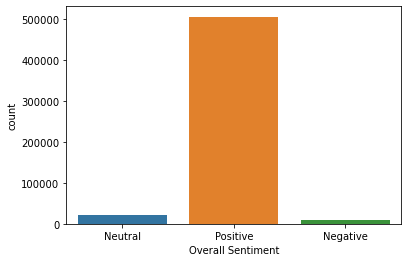

In [104]:
import seaborn as sns
sns.countplot(vader['Overall Sentiment'])

<AxesSubplot:title={'center':'over all sentiment'}, ylabel='Overall Sentiment'>

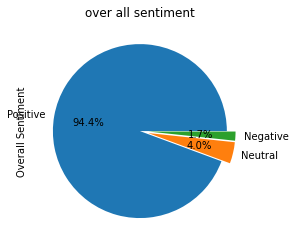

In [105]:
explode = [0, 0.1, 0.1]
vader["Overall Sentiment"].value_counts().plot.pie(title="over all sentiment",autopct='%1.1f%%', 
                        explode = explode
                                 )

In [106]:
df['overallSentiment']=vader["Overall Sentiment"]

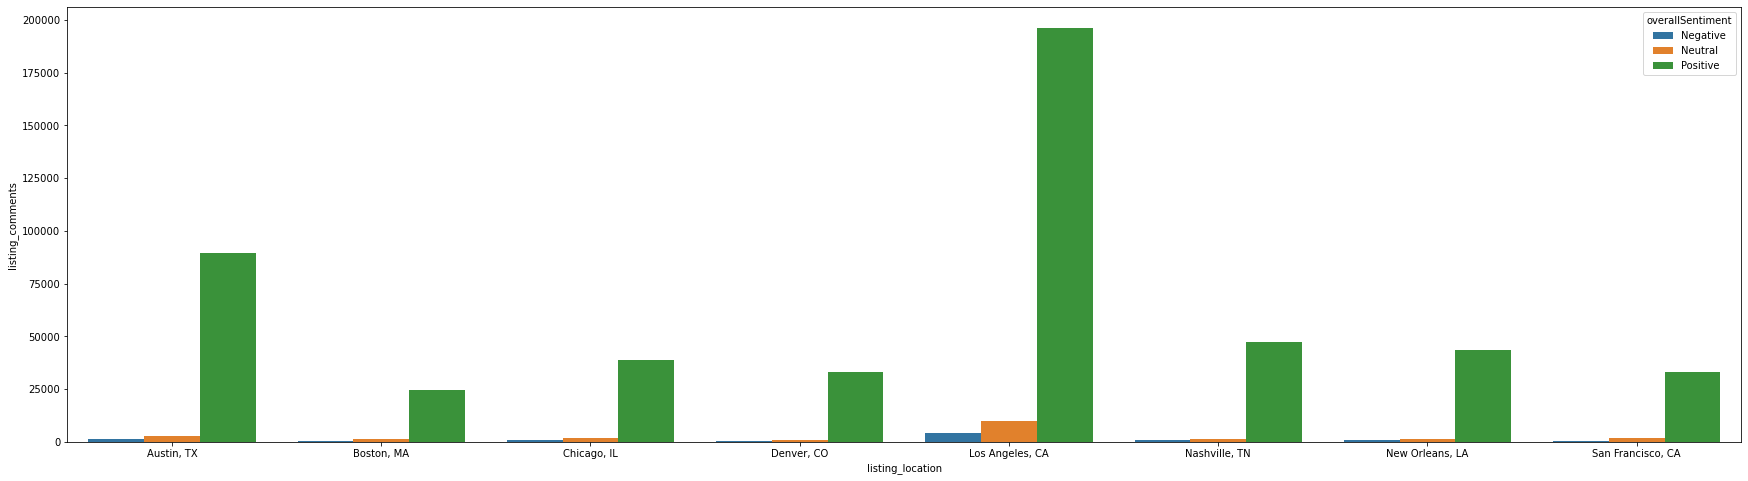

In [107]:
time_df = df.groupby(['overallSentiment','listing_location'])['listing_comments'].count().reset_index()
# time_df=time_df.loc[time_df['Overall Sentiment'] != 'Neutral']
plt.figure(figsize=(30,8))
sns.barplot(data=time_df,x='listing_location',y='listing_comments',hue='overallSentiment')
plt.show()

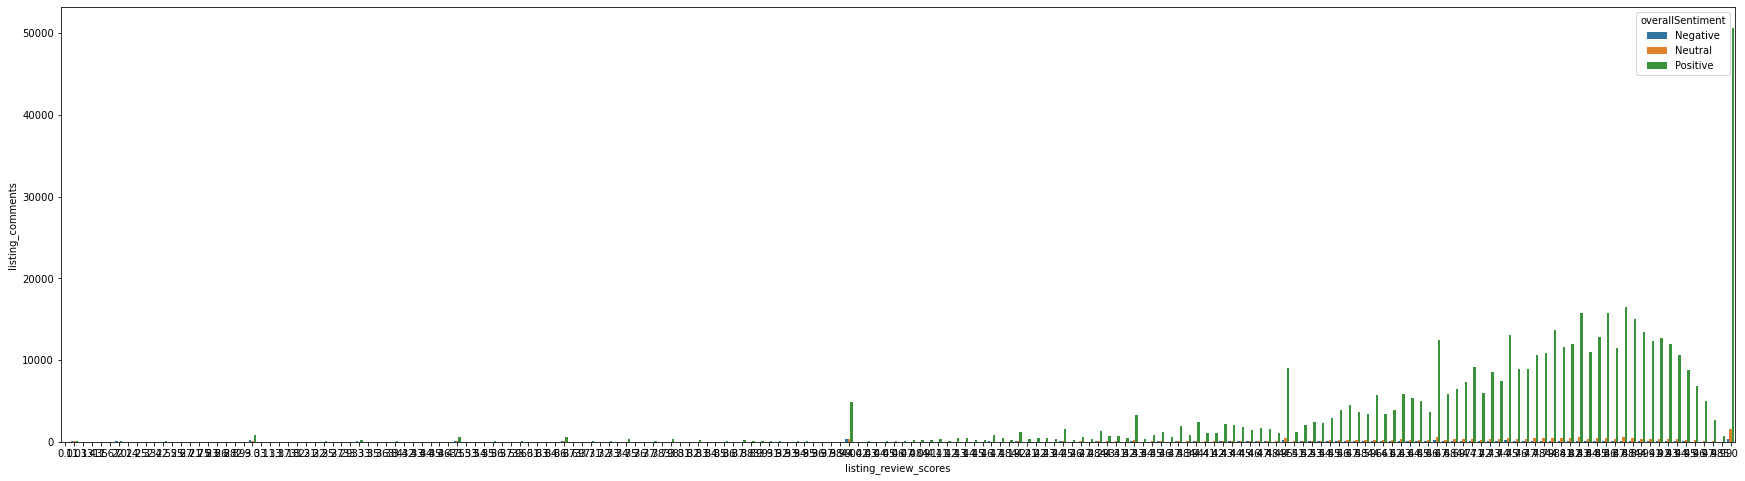

In [108]:
time_df = df.groupby(['overallSentiment','listing_review_scores'])['listing_comments'].count().reset_index()
# time_df=time_df.loc[time_df['Overall Sentiment'] != 'Neutral']
plt.figure(figsize=(30,8))
sns.barplot(data=time_df,x='listing_review_scores',y='listing_comments',hue='overallSentiment')
plt.show()